<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%5BML_4%5D_Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석을 통한 비지도 차원 축소

## 주성분 분석의 주요 단계

In [2]:
from IPython.display import Image
Image(url='https://git.io/JtsvW', width=400) 

## 주성분 추출 단계

1. 데이터를 표준화 전처리
2. 공분산 행렬을 구성
3. 공분산 행렬의 고윳값과 고유벡터를 구하기
4. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순위를 매기기

In [3]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify= y,random_state =0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
import numpy as np

cov_mat = np.cov(X_train_std.T) #특성이 열에 놓여있어서 전치해야함
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat) #고유값 고유벡터 구하기 -> 공분산 행렬 수식을 정리하면 결국에는 고유값 구하는 형태로 나옴 
eigen_vals


array([4.84274532, 2.41602459, 1.54845825, 0.96120438, 0.84166161,
       0.6620634 , 0.51828472, 0.34650377, 0.3131368 , 0.10754642,
       0.21357215, 0.15362835, 0.1808613 ])

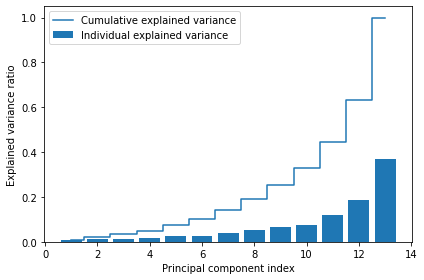

In [6]:
import matplotlib.pyplot as plt

sum_eigen = sum(eigen_vals)
var_exp = [ (i/sum_eigen) for i in sorted(eigen_vals)]
cum_var_exp = np.cumsum(var_exp)#누적합으로 나타낼거임 

plt.bar(range(1, 14), var_exp, align='center',label='Individual explained variance')

plt.step(range(1, 14), cum_var_exp, where='mid',label='Cumulative explained variance')



plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show() #이것보다 역으로 나타내는게 더 직관적으로 보일거 같음

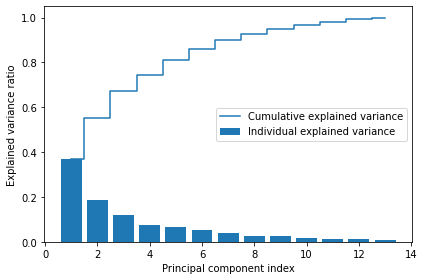

In [7]:
import matplotlib.pyplot as plt

sum_eigen = sum(eigen_vals)
var_exp = [ (i/sum_eigen) for i in sorted(eigen_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)#누적합으로 나타낼거임 

plt.bar(range(1, 14), var_exp, align='center',label='Individual explained variance')

plt.step(range(1, 14), cum_var_exp, where='mid',label='Cumulative explained variance')



plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show() #요게 더 직관적임 -> 두번쨰 데이터 셋까지 분산의 60%정도를 차지

## 특성 변환

5. 고유값이 가장 큰 k개의 고유벡터 선택 (k는 새로운 특성 부분 공간의 차원 , k<d)
6. 최상위 k개의 고유벡터로  투영행렬 W만들기
7. 투영 행렬 W를 사용해서 d차원 입력 데이터셋 X를 새로운 k차원의 특성 부분 공간으로 변환

In [8]:
temp_eigen = [[np.abs(eigen_vals[i]), eigen_vecs[:,i]] for i in range(len(eigen_vals))] #리스트만들고
temp_eigen                                                                  

[[4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])],
 [2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])],
 [1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])],
 [0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])],
 [0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

In [9]:
temp_eigen.sort(key = lambda k: k[0],reverse = True) #가장 큰값 기준으로 내림차순 정렬 시킴
temp_eigen

[[4.8427453156558915,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])],
 [2.4160245870352246,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])],
 [1.5484582488203502,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])],
 [0.9612043774977349,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])],
 [0.8416616104578446,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114

In [10]:
w_1 = np.hstack((temp_eigen[0][1],temp_eigen[1][1]))  #차원 확장 안시켜주면 값이 덮어씌어져서 행렬이 꼬임
w_1

array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
       -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
       -0.32613263, -0.36861022, -0.29669651,  0.50303478,  0.16487119,
        0.24456476, -0.11352904,  0.28974518,  0.05080104, -0.02287338,
        0.09048885,  0.00835233,  0.54977581, -0.20716433, -0.24902536,
        0.38022942])

In [11]:
w = np.hstack((temp_eigen[0][1][:,np.newaxis],temp_eigen[1][1][:,np.newaxis])) #이렇게 차원 늘려서 행렬 만들어 줘야함
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [12]:
X_train_pca = X_train_std.dot(w) #pca 부분공간에 투영하여 2차원으로 만들자

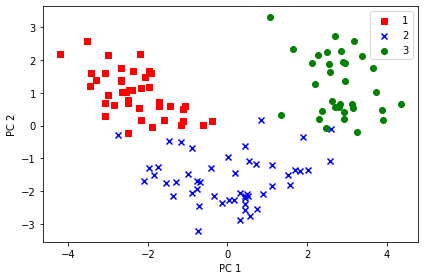

In [13]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 사이킷런의 주성분 분석

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): #2강에서 만들어둔 결정 경계 그리는 함수 가져옴

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.6, color=cmap(idx),edgecolor='black',marker=markers[idx], label=cl)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train_pca, y_train)

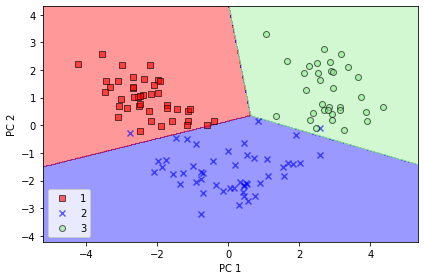

In [16]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show() #train data set

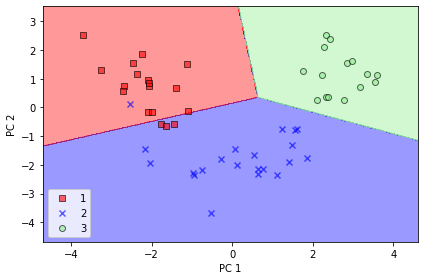

In [17]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show() #test data set

In [18]:
pca = PCA(n_components=None) #이거 None이라고 해줘야 모든 주성분을 확인 가능함 
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_ #모든 분산비율 확인

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [19]:
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558743


In [20]:
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186233


In [21]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446656


# 선형 판별 분석을 통한 지도 방식의 데이터 압축

## 주성분 분석 vs 선형 판별 분석

In [22]:
Image(url='https://git.io/Jtsv8', width=400) 

## 선형 판별 분석의 내부 동작 방식

1. d차원의 데이터셋을 표준화 전처리
2. 각 클래스에 대해 d차원의 평균벡터를 계산 
3. 클래스 간의 산포행렬과 클래스 내 산포행렬을 구성
4. (산포행렬)^-1 * (산포행렬) 의 고유벡터와 고윳값을 계산
5. 고윳값을 내림차순으로 정렬하여 고유 벡터의 순서를 매긴다
6. 고유값이 가장 큰 k개의 고유 벡터를 선택하여 d X K 차원의 변환 행렬 W를 구성
7. 변환행렬 W를 사용하여 샘플을 새로운 특성 부분 공간으로 투영

In [26]:
np.set_printoptions(precision=4)
mean_vecs = []

for label in range(1,4):
  mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
  print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [27]:
d = 13 #특성 개수
S_W = np.zeros((d,d))

for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # 각 클래스에 대한 산포 행렬
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # 열 벡터를 만들기
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # 클래스 산포 행렬을 더함

print('클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [28]:
print('클래스 레이블 분포: %s' % np.bincount(y_train)[1:])

클래스 레이블 분포: [41 50 33]


In [29]:
d = 13  # 특성의 수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: %sx%s' % (S_W.shape[0], S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


In [31]:
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d,1)

S_B = np.zeros((d,d))

for i, mean_vec in enumerate(mean_vecs):
  n = X_train_std[y_train == i + 1, :].shape[0]
  mean_vec = mean_vec.reshape(d, 1)  # 열 벡터로 만들기
  S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('클래스 간의 산포 행렬: %sx%s' % (S_B.shape[0], S_B.shape[1]))

클래스 간의 산포 행렬: 13x13


In [56]:
eigen_vals, eigen_vec = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_vals

array([ 2.8422e-14+0.0000e+00j,  1.7276e+02+0.0000e+00j,
        3.4962e+02+0.0000e+00j, -3.3428e-14+0.0000e+00j,
        2.5546e-14+0.0000e+00j, -9.3297e-15+1.4846e-14j,
       -9.3297e-15-1.4846e-14j,  6.2456e-15+1.5358e-14j,
        6.2456e-15-1.5358e-14j, -2.9746e-15+0.0000e+00j,
        4.3751e-15+6.9856e-15j,  4.3751e-15-6.9856e-15j,
        6.3684e-15+0.0000e+00j])

In [57]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(2.842170943040401e-14,
  array([-0.1372,  0.2472, -0.0255,  0.2069, -0.1544, -0.3938, -0.4174,
          0.3057, -0.3067,  0.0755, -0.3261, -0.3686, -0.2967])),
 (172.7615221897938,
  array([ 0.503 ,  0.1649,  0.2446, -0.1135,  0.2897,  0.0508, -0.0229,
          0.0905,  0.0084,  0.5498, -0.2072, -0.249 ,  0.3802])),
 (349.61780890599397,
  array([-0.1377,  0.0962,  0.6778,  0.625 ,  0.1961,  0.1403,  0.1171,
          0.1312,  0.0304, -0.0799,  0.0531,  0.1324, -0.0707])),
 (3.3428382148413644e-14,
  array([-0.0033,  0.5626, -0.109 ,  0.0338, -0.3675,  0.2402,  0.1871,
         -0.0229,  0.4963,  0.1065, -0.3691,  0.142 , -0.1677])),
 (2.5545786180111397e-14,
  array([-0.2906,  0.0895, -0.1608,  0.0516,  0.6765, -0.1185, -0.1071,
         -0.5076,  0.2016,  0.0057, -0.2769, -0.0666, -0.128 ])),
 (1.753393918073425e-14,
  array([ 2.9910e-01,  6.2704e-01,  3.8913e-04, -4.0584e-02,  6.5777e-02,
         -5.8978e-02, -3.0110e-02, -2.7173e-01, -4.4000e-01, -4.1174e-01,
          1.4167e

In [59]:
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
eigen_pairs

[(349.61780890599397,
  array([-0.1377,  0.0962,  0.6778,  0.625 ,  0.1961,  0.1403,  0.1171,
          0.1312,  0.0304, -0.0799,  0.0531,  0.1324, -0.0707])),
 (172.7615221897938,
  array([ 0.503 ,  0.1649,  0.2446, -0.1135,  0.2897,  0.0508, -0.0229,
          0.0905,  0.0084,  0.5498, -0.2072, -0.249 ,  0.3802])),
 (3.3428382148413644e-14,
  array([-0.0033,  0.5626, -0.109 ,  0.0338, -0.3675,  0.2402,  0.1871,
         -0.0229,  0.4963,  0.1065, -0.3691,  0.142 , -0.1677])),
 (2.842170943040401e-14,
  array([-0.1372,  0.2472, -0.0255,  0.2069, -0.1544, -0.3938, -0.4174,
          0.3057, -0.3067,  0.0755, -0.3261, -0.3686, -0.2967])),
 (2.5545786180111397e-14,
  array([-0.2906,  0.0895, -0.1608,  0.0516,  0.6765, -0.1185, -0.1071,
         -0.5076,  0.2016,  0.0057, -0.2769, -0.0666, -0.128 ])),
 (1.753393918073425e-14,
  array([ 2.9910e-01,  6.2704e-01,  3.8913e-04, -4.0584e-02,  6.5777e-02,
         -5.8978e-02, -3.0110e-02, -2.7173e-01, -4.4000e-01, -4.1174e-01,
          1.4167e

In [60]:
for eigen_val in eigen_pairs:
  print(eigen_val[0])

349.61780890599397
172.7615221897938
3.3428382148413644e-14
2.842170943040401e-14
2.5545786180111397e-14
1.753393918073425e-14
1.753393918073425e-14
1.657919399596089e-14
1.657919399596089e-14
8.242524002707208e-15
8.242524002707208e-15
6.36835506006027e-15
2.97463437554573e-15


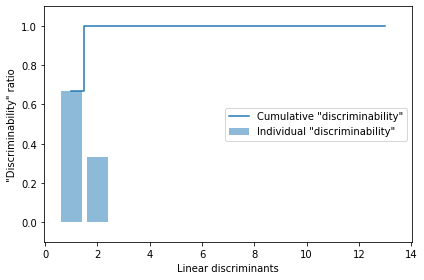

In [61]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [63]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W:\n', w)

행렬 W:
 [[-0.1377  0.503 ]
 [ 0.0962  0.1649]
 [ 0.6778  0.2446]
 [ 0.625  -0.1135]
 [ 0.1961  0.2897]
 [ 0.1403  0.0508]
 [ 0.1171 -0.0229]
 [ 0.1312  0.0905]
 [ 0.0304  0.0084]
 [-0.0799  0.5498]
 [ 0.0531 -0.2072]
 [ 0.1324 -0.249 ]
 [-0.0707  0.3802]]


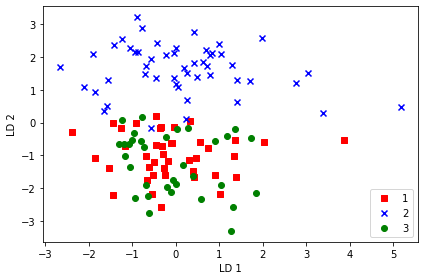

In [65]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_lda[y_train == l, 0],X_train_lda[y_train == l, 1] * (-1),c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show() #어라 이렇게 나오면 안되는데

In [23]:
a = np.arange(10).reshape(2,5)
b = np.arange(15).reshape(3,5)
c = np.arange(8).reshape(2,4)
d = list(range(5))
print('1번'   ,a)
print('2번'    ,c)

h = np.hstack((a,c))
print('3번',h)

1번 [[0 1 2 3 4]
 [5 6 7 8 9]]
2번 [[0 1 2 3]
 [4 5 6 7]]
3번 [[0 1 2 3 4 0 1 2 3]
 [5 6 7 8 9 4 5 6 7]]
